![](1.png)

![](2.png)

## From the the above problem statement we are asking to build a Machine Learning Model after data analysis and predict the flight fare which is continuous data, So we can assume that it is a Regression problem.

In [109]:
#importing the libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [110]:
## loading the dataset
data = pd.read_csv('DATASET.csv')

## Explore dataset

In [111]:
data.head()

,Airline,Departure_time,Duration,Stops,Price,Date,Unnamed: 0
0,Go First,09:05,2h 00m,Non Stop,"5,954","Wed, 27 Oct",NaN
1,Go First,06:15,2h 05m,Non Stop,"5,954","Wed, 27 Oct",NaN
2,Go First,14:20,2h 05m,Non Stop,"5,954","Wed, 27 Oct",NaN
3,Go First,20:30,2h 05m,Non Stop,"5,954","Wed, 27 Oct",NaN
4,Go First,21:30,2h 05m,Non Stop,"5,954","Wed, 27 Oct",NaN


### Using the head() method we can see the first 5 records of our dataset.

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4477 entries, 0 to 4476
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline         4477 non-null   object 
 1   Departure_time  4477 non-null   object 
 2   Duration        4477 non-null   object 
 3   Stops           4477 non-null   object 
 4   Price           4477 non-null   object 
 5   Date            4477 non-null   object 
 6   Unnamed: 0      309 non-null    float64
dtypes: float64(1), object(6)
memory usage: 245.0+ KB


### Using info() method we can see some import informations of our dataset like "Dtype", "Non-Null Count " and here we can see that our dataset has two differents dtype "object" and "float".

In [113]:
## checking for missing values
data.isna().sum()

Airline              0
Departure_time       0
Duration             0
Stops                0
Price                0
Date                 0
Unnamed: 0        4168
dtype: int64

### From the above verification we can see that there missing values in only "Unnamed: 0" attribute

# Data Cleaning

In [114]:
## Checking for duplicated values

data.duplicated().sum()

57

In [115]:
## dropping the duplicated values
# Drop duplicates value
data.drop_duplicates(keep='first',inplace=True)


In [116]:
## verification

data.duplicated().sum()

0

In [117]:
## let's drop the Unnamed: 0 column.

data.drop('Unnamed: 0',axis=1,inplace=True)

In [118]:
data.shape

(4420, 6)

In [119]:
data.head(1)

,Airline,Departure_time,Duration,Stops,Price,Date
0,Go First,09:05,2h 00m,Non Stop,"5,954","Wed, 27 Oct"


In [120]:
#let's rename the columns and make them easy to understand

data.rename(columns = {'Date': 'Date_of_Journey', 'Stops': 'Total_Stops'}, inplace = True)

In [121]:
data.head(3)

,Airline,Departure_time,Duration,Total_Stops,Price,Date_of_Journey
0,Go First,09:05,2h 00m,Non Stop,"5,954","Wed, 27 Oct"
1,Go First,06:15,2h 05m,Non Stop,"5,954","Wed, 27 Oct"
2,Go First,14:20,2h 05m,Non Stop,"5,954","Wed, 27 Oct"


# Feature Engineering ( Dividing data into features and labels)

In [122]:
# Duration convert hours in min.

data['Duration']=  data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('05','5').str.replace('m','*1').apply(eval)

In [123]:
data['Duration']

0       120
1       125
2       125
3       125
4       125
       ... 
4471    960
4472    995
4473    680
4474    620
4476    520
Name: Duration, Length: 4420, dtype: int64

In [124]:
data.head(1)

,Airline,Departure_time,Duration,Total_Stops,Price,Date_of_Journey
0,Go First,09:05,120,Non Stop,"5,954","Wed, 27 Oct"


In [125]:
# Date_of_Journey

Journey_day = []
Journey_month = []
for x in data['Date_of_Journey']:
    Journey_day.append(x.split(' ')[1])
    Journey_month.append(x.split(' ')[2])
data["Journey_day"] = Journey_day
data["Journey_month"] = Journey_month
data["Journey_day"] = data["Journey_day"].astype(str).astype(int)
data.drop('Date_of_Journey',axis=1,inplace=True)

In [126]:
# Departure_time

data["Dep_hour"] = pd.to_datetime(data["Departure_time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Departure_time"]).dt.minute
data.drop(["Departure_time"], axis = 1, inplace = True)

In [127]:
## Price
data['Price'] = data['Price'].str.replace(',','')

## converting into integer
data['Price'] = data['Price'].astype(str).astype(int)    

In [128]:
data.head(2)

,Airline,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,Go First,120,Non Stop,5954,27,Oct,9,5
1,Go First,125,Non Stop,5954,27,Oct,6,15


###  Let's used label Encoder to encoder the text data.

In [129]:
data['Airline'].value_counts()

IndiGo       1523
Air India     704
Go First      691
Vistara       625
Air Asia      561
SpiceJet      316
Name: Airline, dtype: int64

In [130]:
data['Total_Stops'].value_counts()

1 Stop       1875
Non Stop     1849
2 Stop(s)     643
3 Stop(s)      48
4 Stop(s)       5
Name: Total_Stops, dtype: int64

In [131]:

data['Journey_month'].value_counts()

Nov    2521
Dec    1258
Oct     641
Name: Journey_month, dtype: int64

In [132]:
data['Journey_month'] = data['Journey_month'].replace({'Oct':0,'Nov':1,'Dec':2})

In [133]:
## verification 

data['Journey_month']

0       0
1       0
2       0
3       0
4       0
       ..
4471    2
4472    2
4473    2
4474    2
4476    2
Name: Journey_month, Length: 4420, dtype: int64

In [134]:
## Total_Stop

data['Total_Stops'] = data['Total_Stops'].replace({'Non Stop':0, '1 Stop':1, '2 Stop(s)':2, '3 Stop(s)':3, '4 Stop(s)':4})


In [135]:
data['Total_Stops']

0       0
1       0
2       0
3       0
4       0
       ..
4471    2
4472    2
4473    2
4474    2
4476    2
Name: Total_Stops, Length: 4420, dtype: int64

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4420 entries, 0 to 4476
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        4420 non-null   object
 1   Duration       4420 non-null   int64 
 2   Total_Stops    4420 non-null   int64 
 3   Price          4420 non-null   int64 
 4   Journey_day    4420 non-null   int64 
 5   Journey_month  4420 non-null   int64 
 6   Dep_hour       4420 non-null   int64 
 7   Dep_min        4420 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 310.8+ KB


In [137]:
data.shape

(4420, 8)

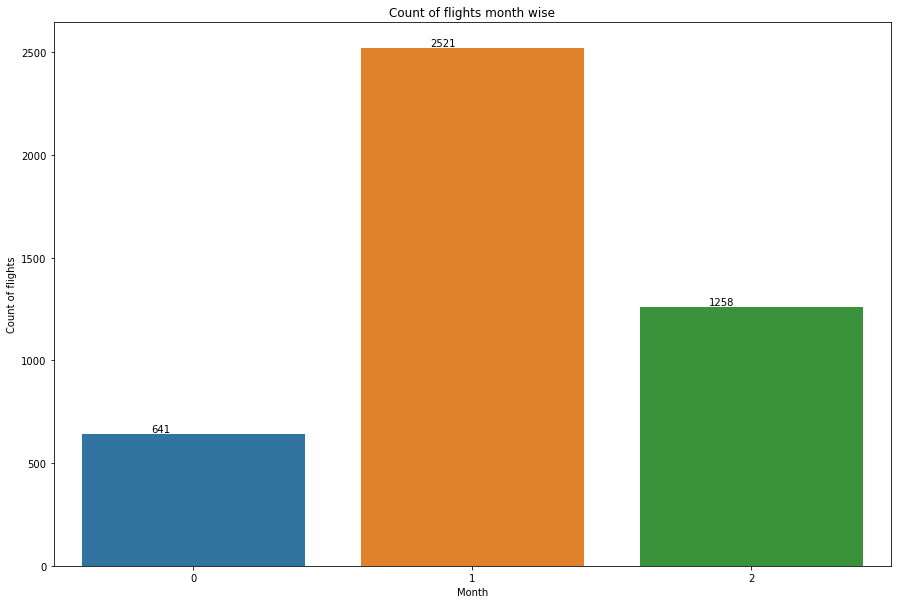

In [138]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = data)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

### From the above countplot we can see  that there is more flight in the month of November

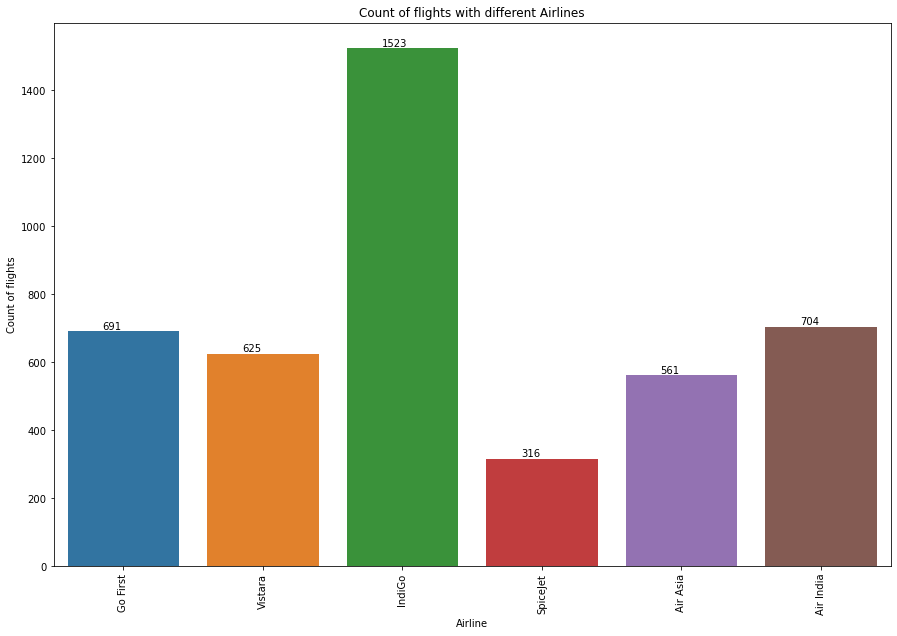

In [139]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

There are more number of flights of IndiGo.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

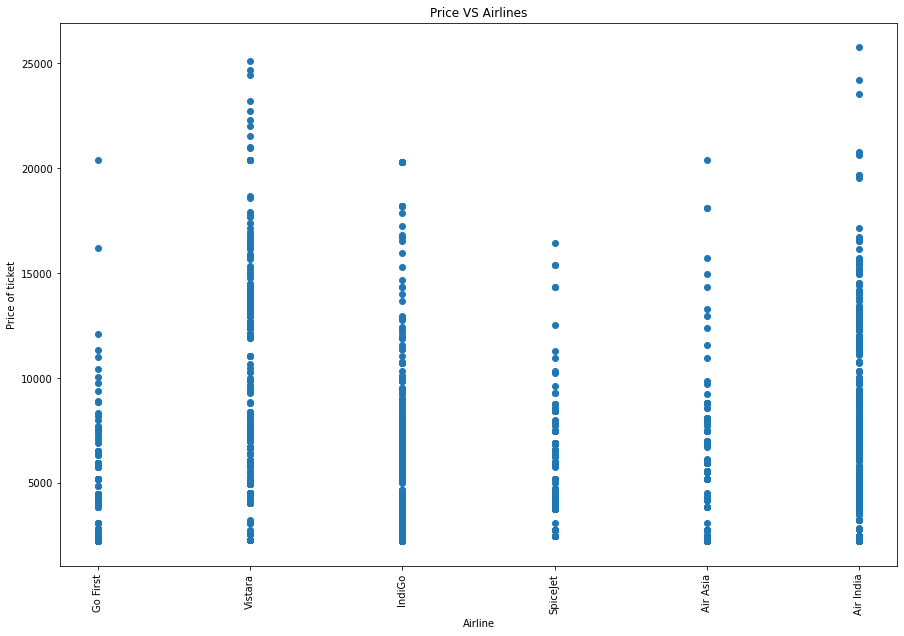

In [142]:
## Let's check the Price vs Airlines

plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(data['Airline'], data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

The ticket price rate for Vistara and Air India are  higher than other companies.

In [144]:
# Instantiate the method.

from sklearn.preprocessing import LabelEncoder
Lb_End = LabelEncoder()

In [145]:
# Airline

Airline = Lb_End.fit_transform(data['Airline'])

## Updating  Car_transmission  with the numerical values
data['Airline'] = Airline 
data['Airline']

0       2
1       2
2       2
3       2
4       2
       ..
4471    5
4472    5
4473    5
4474    5
4476    3
Name: Airline, Length: 4420, dtype: int64

In [146]:
data.describe()

,Airline,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min
count,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000
mean,2.498643,448.726244,0.752262,6258.507466,15.501810,1.139593,12.697964,26.363122
std,1.523816,396.570136,0.745770,3119.542744,9.825532,0.640503,6.046583,18.358541
min,0.000000,95.000000,0.000000,2202.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,140.000000,0.000000,4200.000000,8.000000,1.000000,7.000000,10.000000
50%,3.000000,330.000000,1.000000,5953.000000,12.000000,1.000000,12.000000,30.000000
75%,3.000000,610.000000,1.000000,7488.000000,27.000000,2.000000,18.000000,45.000000
max,5.000000,2410.000000,4.000000,25759.000000,31.000000,2.000000,23.000000,55.000000


### From the above code we can see some important statistics informations about data like  mean, standar deviation, minimum and maximum and the quantitles of each attributes.

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4420 entries, 0 to 4476
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Airline        4420 non-null   int64
 1   Duration       4420 non-null   int64
 2   Total_Stops    4420 non-null   int64
 3   Price          4420 non-null   int64
 4   Journey_day    4420 non-null   int64
 5   Journey_month  4420 non-null   int64
 6   Dep_hour       4420 non-null   int64
 7   Dep_min        4420 non-null   int64
dtypes: int64(8)
memory usage: 439.8 KB


### From the above verification using info()  on our datatset ,we can see that our dataset has only Dtype = int64  and this mean our dataset contains only numerical data.


let's save the above version of our data to avoid running again and again the above codes .

In [148]:
data.to_csv('data_v0.csv',index=False)

In [149]:
new_data = pd.read_csv('data_v0.csv')

In [150]:
new_data.shape

(4420, 8)

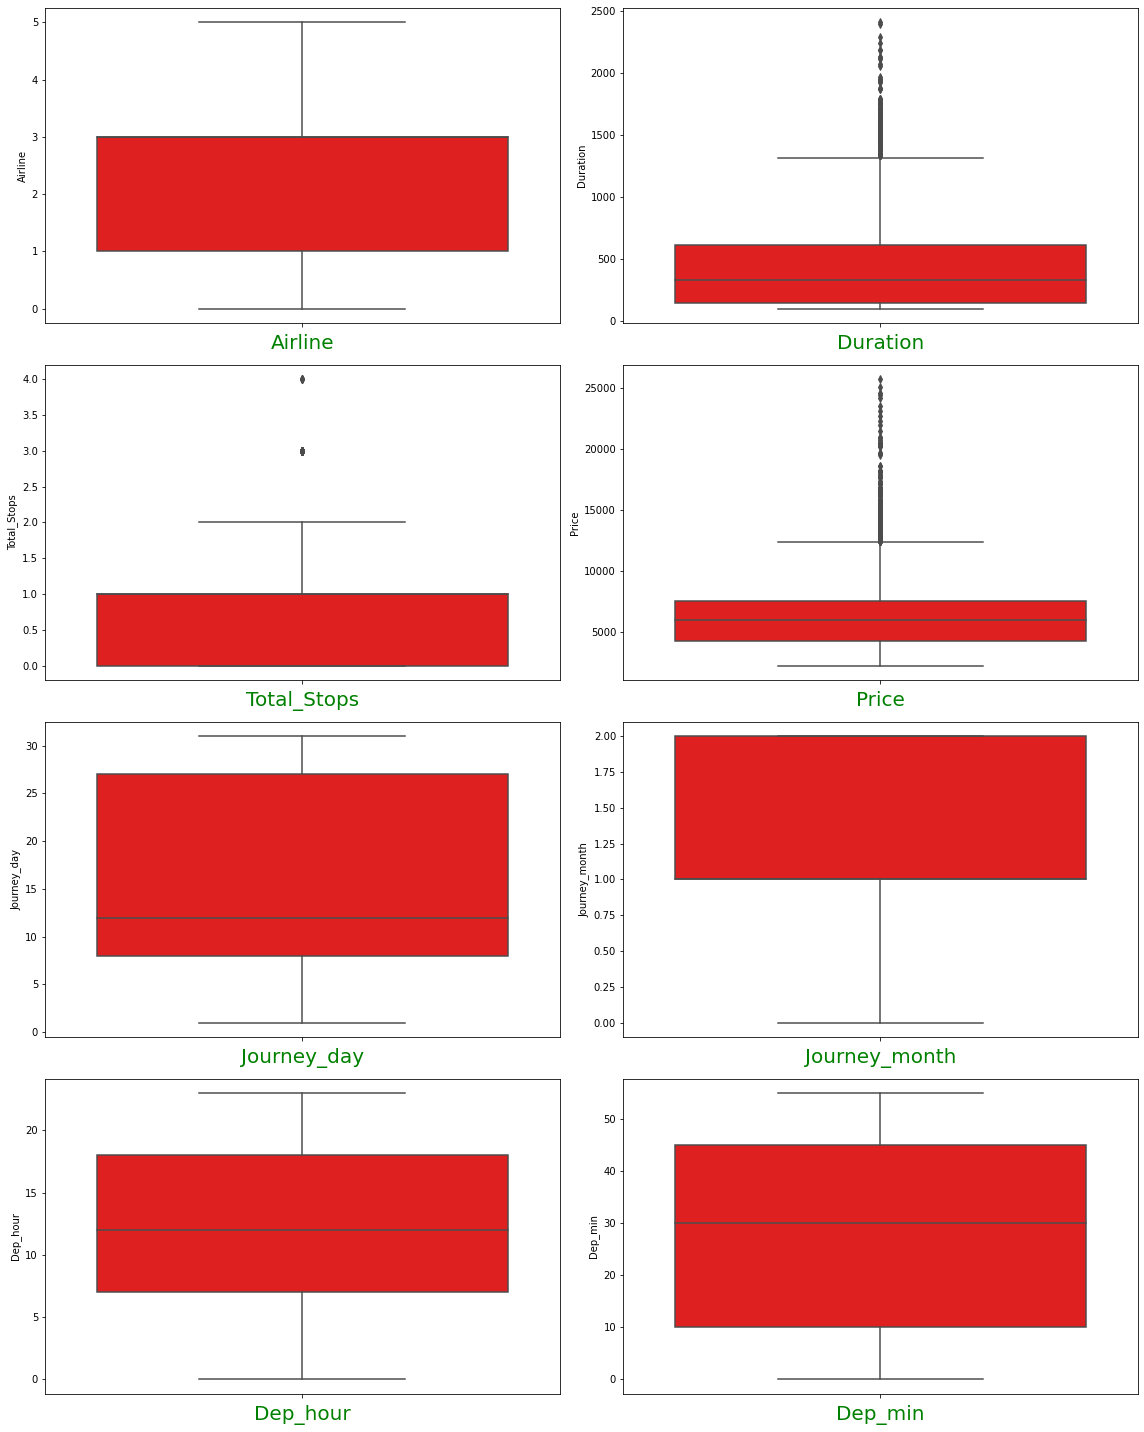

In [152]:
plt.figure(figsize=(16,20))
plotnumber = 1

for column in new_data:
    if plotnumber <= 8:
        ax = plt.subplot(4,2,plotnumber)
        sns.boxplot(y= new_data[column],color='red',orient='h')
        plt.xlabel(column,fontsize = 20,color='green')
    plotnumber+=1
plt.tight_layout()

### From the above boxplot graphs we can see outliers in some columns [ Total_Stops, Duration and Price], we will remove the Outliers the columns.

Let's use the Quantiles techniques and see if we can remove them..

##### Outlier Dectection Formula
##### Higher side ===> Q3 + (1.5 * IQR)
##### lower side ===> Q1 - (1.5 * IQR)
##### IQR = Inter Quantile Rate = Q3 - Q1

In [154]:
## Find the IQR ( Inter Quantile Range) to identify outlier

# 1st quantile
q1 = new_data.quantile(0.25)

# 3rd quantile
q3 = new_data.quantile(0.75)

#IQR 
iqr = q3 - q1

In [155]:
high_Price = (q3.Price + (1.5 * iqr.Price))
high_Price

12420.0

This means from the column "Price" all the records values greater than 12420.0 (Price > 12420.0) are Outliers.

In [156]:
## the get indexes of those records
indexes = np.where(new_data['Price'] > high_Price)
indexes

(array([ 498,  499,  500,  501,  502, 1690, 1691, 1887, 1888, 1889, 1899,
        1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1911, 1912, 1913,
        1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924,
        1925, 1926, 1941, 1942, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
        1956, 1957, 1958, 1959, 1960, 2058, 2059, 2277, 2293, 2294, 2307,
        2308, 2309, 2310, 2311, 2312, 2313, 2326, 2327, 2328, 2329, 2330,
        2331, 2347, 2348, 2349, 2361, 2362, 2363, 2364, 2365, 2366, 2367,
        2684, 2701, 2718, 2735, 2736, 2737, 2754, 2771, 2779, 2780, 2781,
        2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792,
        2793, 2794, 2795, 2796, 2801, 2802, 2803, 2804, 2805, 2806, 2807,
        2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818,
        2819, 2842, 2843, 2844, 3126, 3127, 3128, 3408, 3409, 3410, 3411,
        3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422,
        3423, 3424, 3425, 3426, 3427, 

In [157]:
## Let's drop indexes from the dataset

new_data= new_data.drop(new_data.index[indexes])

## reset the index
new_data.reset_index(drop=True)

,Airline,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,2,120,0,5954,27,0,9,5
1,2,125,0,5954,27,0,6,15
2,2,125,0,5954,27,0,14,20
3,2,125,0,5954,27,0,20,30
4,2,125,0,5954,27,0,21,30
...,...,...,...,...,...,...,...,...
4142,5,960,2,7624,11,2,6,40
4143,5,995,2,7624,11,2,19,55
4144,5,680,2,7717,11,2,8,30
4145,5,620,2,8084,11,2,9,30


In [159]:
## "Duration",column

indexes = np.where(new_data["Duration"] > (q3.Duration + (1.5 * iqr.Duration)))
new_data= new_data.drop(new_data.index[indexes])
new_data.reset_index(drop=True)


,Airline,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,2,120,0,5954,27,0,9,5
1,2,125,0,5954,27,0,6,15
2,2,125,0,5954,27,0,14,20
3,2,125,0,5954,27,0,20,30
4,2,125,0,5954,27,0,21,30
...,...,...,...,...,...,...,...,...
3959,5,960,2,7624,11,2,6,40
3960,5,995,2,7624,11,2,19,55
3961,5,680,2,7717,11,2,8,30
3962,5,620,2,8084,11,2,9,30


In [160]:
## "Duration",column

indexes = np.where(new_data["Total_Stops"] > (q3.Total_Stops + (1.5 * iqr.Total_Stops)))
new_data= new_data.drop(new_data.index[indexes])
new_data.reset_index(drop=True)

,Airline,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,2,120,0,5954,27,0,9,5
1,2,125,0,5954,27,0,6,15
2,2,125,0,5954,27,0,14,20
3,2,125,0,5954,27,0,20,30
4,2,125,0,5954,27,0,21,30
...,...,...,...,...,...,...,...,...
3945,5,960,2,7624,11,2,6,40
3946,5,995,2,7624,11,2,19,55
3947,5,680,2,7717,11,2,8,30
3948,5,620,2,8084,11,2,9,30


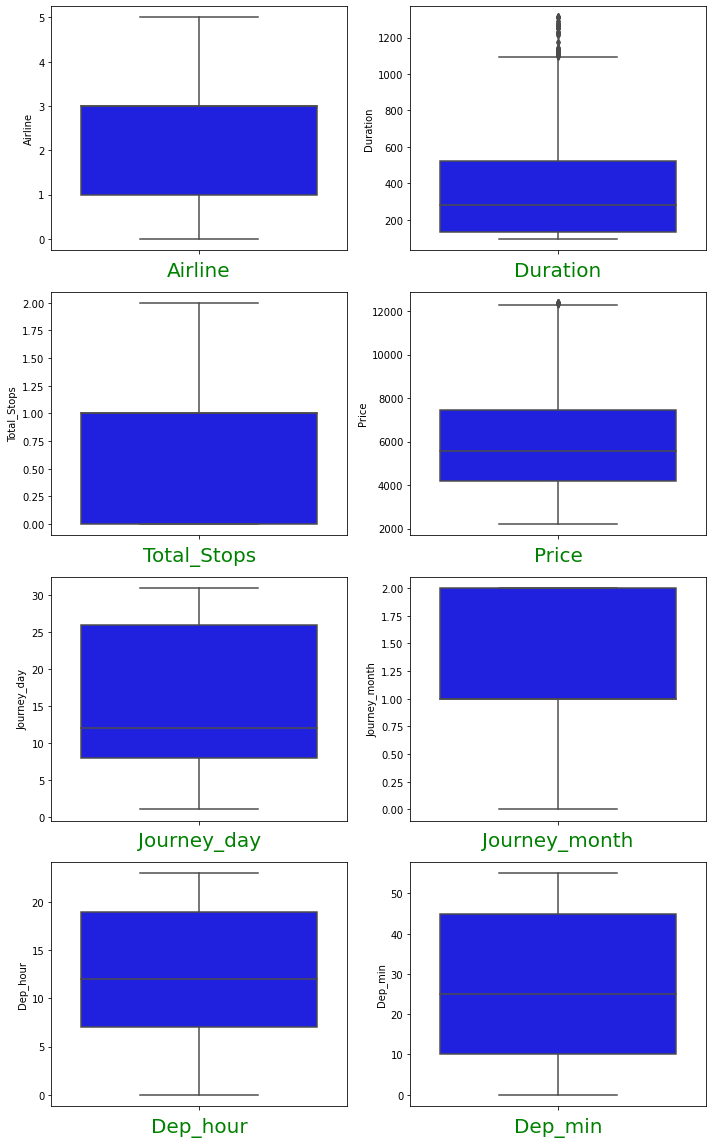

In [161]:
## verification
plt.figure(figsize=(10,16))
plotnumber = 1

for column in new_data:
    if plotnumber <= 8:
        ax = plt.subplot(4,2,plotnumber)
        sns.boxplot(y= new_data[column],color='blue',orient='h')
        plt.xlabel(column,fontsize = 20,color='green')
    plotnumber+=1
plt.tight_layout()

From the boxplots here we can say that our data look better than before after removing the previous outliers.

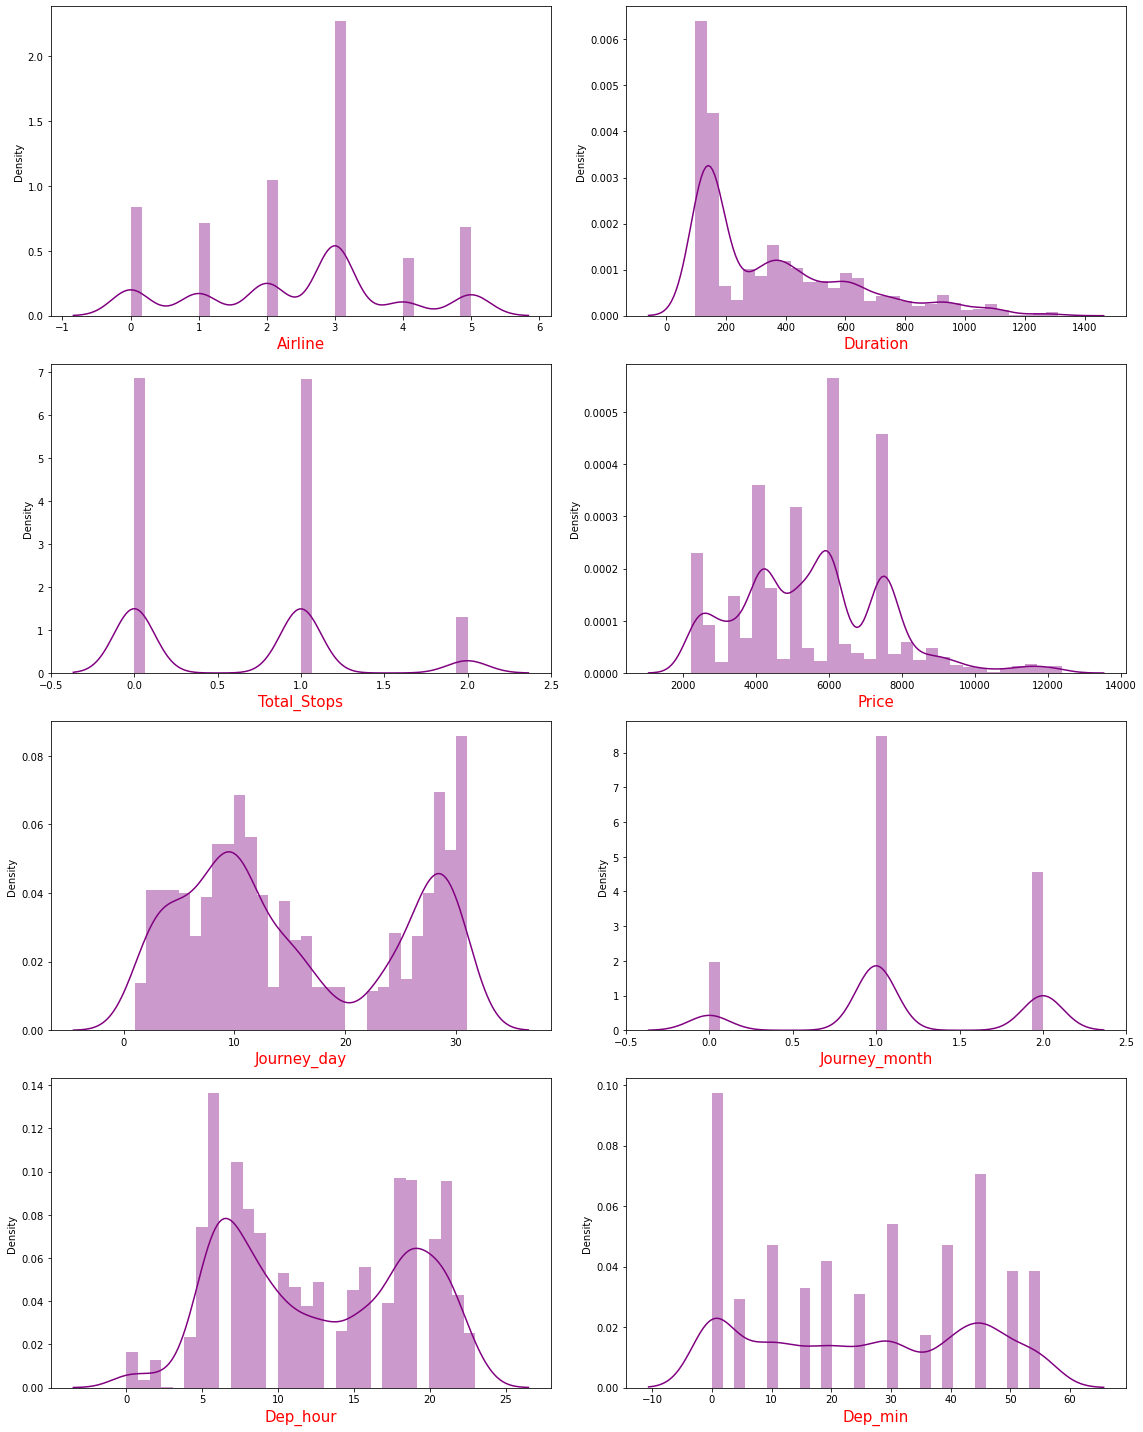

In [162]:
# plot a  distplot check the distribution and check for skewness

plt.figure(figsize=(16,20))
plotnumber = 1

for column in new_data:
    if plotnumber <= 8:
        ax = plt.subplot(4,2,plotnumber)
        sns.distplot(new_data[column],bins=30,color='purple')
        plt.xlabel(column,fontsize = 15,color='red')
    plotnumber+=1
plt.tight_layout()

we can see that we have still more skewness in our dataset so let's remove them.

### Let's  remove the sknewness from features columns

In [163]:
## importing the libraries
from sklearn.preprocessing import PowerTransformer

In [164]:
pt=PowerTransformer(method='yeo-johnson')
features = new_data.drop('Price',axis=1)

In [165]:
X_power=pt.fit_transform(features)

In [166]:
X_power

array([[-0.30347145, -1.21675165, -1.05552373, ..., -1.80268089,
        -0.55307572, -1.0490636 ],
       [-0.30347145, -1.14618435, -1.05552373, ..., -1.80268089,
        -1.09874261, -0.36281905],
       [-0.30347145, -1.14618435, -1.05552373, ..., -1.80268089,
         0.26871614, -0.09255237],
       ...,
       [ 1.69831451,  1.21060763,  1.66427003, ...,  1.31840696,
        -0.72941763,  0.37691124],
       [ 1.69831451,  1.10725773,  1.66427003, ...,  1.31840696,
        -0.55307572,  0.37691124],
       [ 0.37285016,  0.9033666 ,  1.66427003, ...,  1.31840696,
        -0.38133858, -0.67180598]])

In [167]:
## create a dataframe with the feature data

df=pd.DataFrame(X_power,columns=features.columns)

In [168]:

df.head(4)

,Airline,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min
0,-0.303471,-1.216752,-1.055524,1.138125,-1.802681,-0.553076,-1.049064
1,-0.303471,-1.146184,-1.055524,1.138125,-1.802681,-1.098743,-0.362819
2,-0.303471,-1.146184,-1.055524,1.138125,-1.802681,0.268716,-0.092552
3,-0.303471,-1.146184,-1.055524,1.138125,-1.802681,1.163705,0.376911


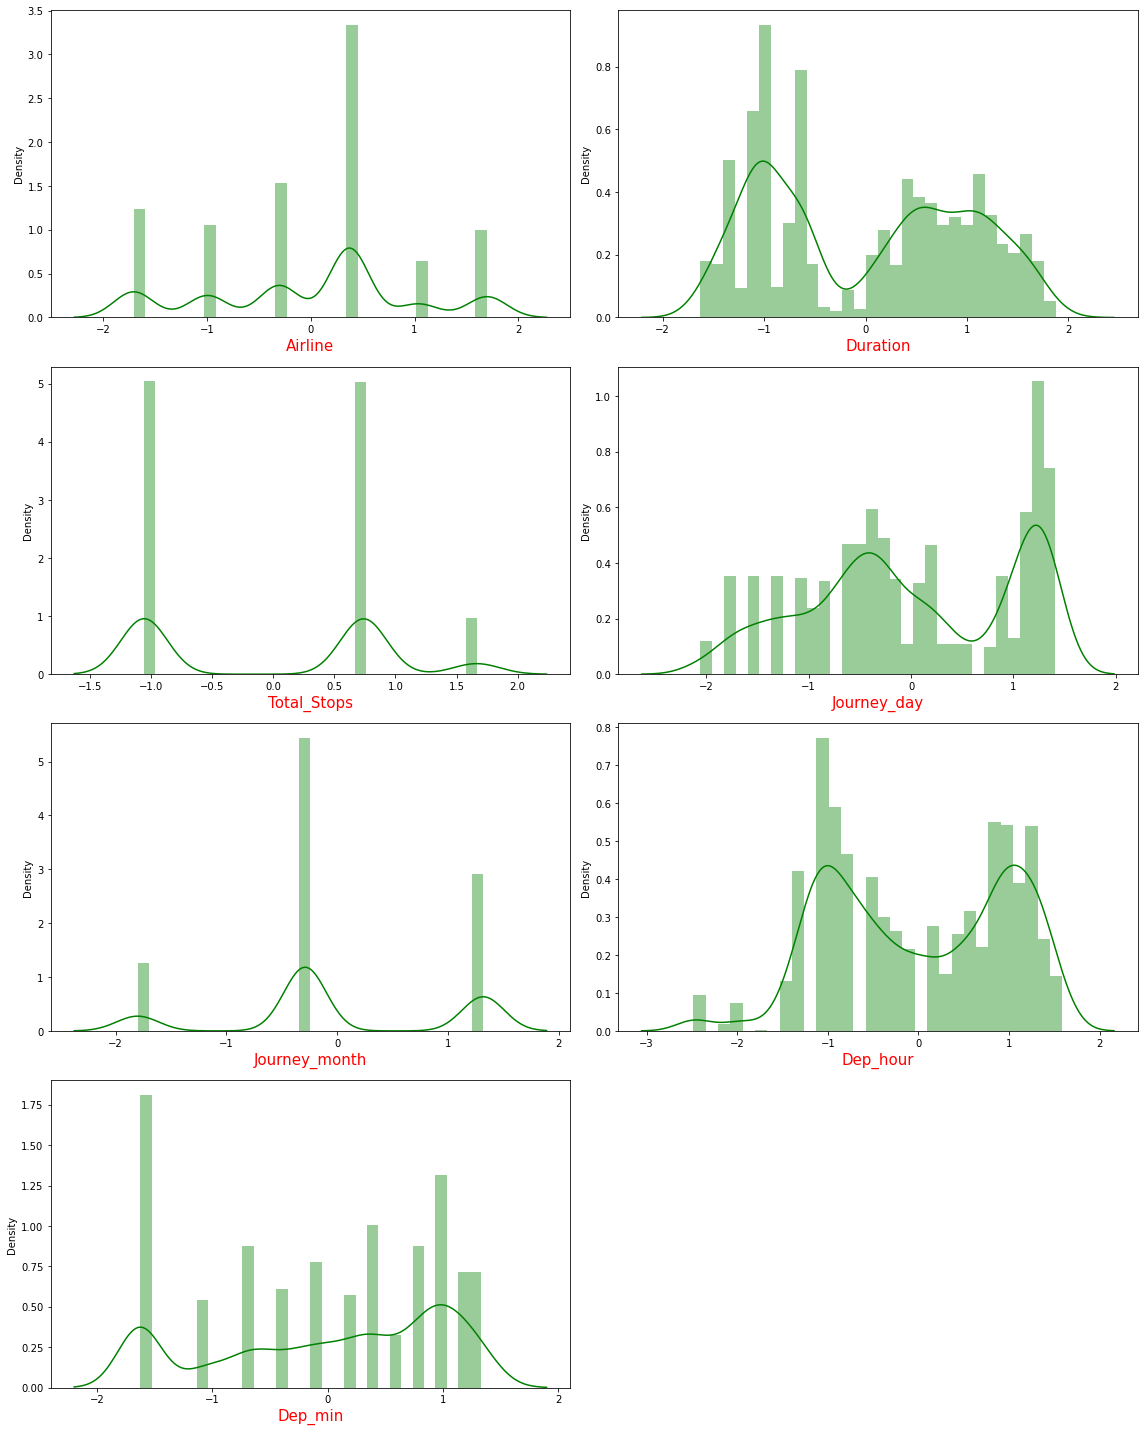

In [170]:
# plot a  distplot check the distribution and check for skewness

plt.figure(figsize=(16,20))
plotnumber = 1

for column in df:
    if plotnumber <= 7:
        ax = plt.subplot(4,2,plotnumber)
        sns.distplot(df[column],bins=30,color='green')
        plt.xlabel(column,fontsize = 15,color='red')
    plotnumber+=1
plt.tight_layout()

From here we can see that our data look better and the skeness are removed

In [172]:
## saving again this version of our dataset

df.to_csv('data_v1.csv',index=False)

In [175]:
label = new_data['Price']

In [176]:
label

0        5954
1        5954
2        5954
3        5954
4        5954
        ...  
4415     7624
4416     7624
4417     7717
4418     8084
4419    10050
Name: Price, Length: 3950, dtype: int64

## Our dataset is ready now!

### Building Machine Learning Models

In [195]:
## Importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from sklearn import metrics

In [178]:
## Features standarization

scale = StandardScaler()
X_scaled = scale.fit_transform(df)

In [185]:
##  let's build the model with this random state

x_train, x_test, y_train,y_test = train_test_split(X_scaled,label,
                                                    test_size=30,
                                                   random_state=99)

In [186]:
print("The size of training input is", x_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", x_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (3920, 7)
The size of training output is (3920,)
**************************************************
The size of testing input is (30, 7)
The size of testing output is (30,)


In [199]:
#First model with LinearRegression

Lr = LinearRegression()
Lr.fit(x_train, y_train)

LinearRegression()

In [207]:
y_lr_pred = Lr.predict(x_test)

In [208]:

print('*****The Accuracy of test data ****\n')
print(metrics.r2_score(y_test,y_lr_pred))

*****The Accuracy of test data ****

0.6501826274253995


In [205]:
### let's check the mean_absolute_error

MAE = mean_absolute_error(y_test,y_lr_pred1)
print(MAE)

841.285502939119


#### The accuracy r2_score 65% is not too bad and also the errors size is too high so let's build more models see which one fit better for our dataset.

In [209]:
### instantiate the models

dtr = DecisionTreeRegressor(random_state=99)
ada = AdaBoostRegressor(random_state=99)
rid = Ridge(random_state=99)
las = Lasso(random_state=99)
rfr = RandomForestRegressor(random_state=99)

In [210]:
## fitting the models

dtr.fit(x_train,y_train)
ada.fit(x_train,y_train)
rid.fit(x_train,y_train)
las.fit(x_train,y_train)
rfr.fit(x_train,y_train)
print('Models are accessfully fitted.!!!')

Models are accessfully fitted.!!!


In [211]:
## making the prediction

dt_ypred = dtr.predict(x_test)
ada_ypred = ada.predict(x_test)
rid_ypred = rid.predict(x_test)
las_ypred = las.predict(x_test)
rfr_pred = rfr.predict(x_test)
print('Models are accessfully predicted.!!!')

Models are accessfully predicted.!!!


#### Models Evaluation

In [212]:
## Models evaluation using Mean Absolute Erro

dt_mae  = mean_absolute_error(y_test,dt_ypred)
ada_mae = mean_absolute_error(y_test,ada_ypred)
rid_mae = mean_absolute_error(y_test,rid_ypred)
las_mae = mean_absolute_error(y_test,las_ypred)
rfr_mae = mean_absolute_error(y_test,rfr_pred)

print('\n','-'*50)
print('\nThe Mean Absolute Erro of DecisionTreeRegressor model is:',dt_mae )
print('\n','-'*50)
print('\nThe Mean Absolute Erro of AdaBoostRegressor model is:',ada_mae)
print('\n','-'*50)
print('\nThe Mean Absolute Erro of Ridge model is:',rid_mae)
print('\n','-'*50)
print('\nThe Mean Absolute Erro of Lasso model is:',las_mae)
print('\n','-'*50)
print('\nThe Mean Absolute Erro of RandomForestRegressor model is:',rfr_mae)


 --------------------------------------------------

The Mean Absolute Erro of DecisionTreeRegressor model is: 445.4

 --------------------------------------------------

The Mean Absolute Erro of AdaBoostRegressor model is: 958.6857355785328

 --------------------------------------------------

The Mean Absolute Erro of Ridge model is: 841.2340664991698

 --------------------------------------------------

The Mean Absolute Erro of Lasso model is: 841.3704187497317

 --------------------------------------------------

The Mean Absolute Erro of RandomForestRegressor model is: 428.4593333333333


#### From the above verification we can see that RandomForestRegressor model :MAE =445.4  fit better our data.

In [213]:
## Models evaluation using Mean Square Error (MSE)

print('\nThe Mean Square Erro of DecisionTreeRegressor model is:',mean_squared_error(y_test,dt_ypred))
print('\n','-'*50)
print('\nThe Mean Square Erro of AdaBoostRegressor model is:',mean_squared_error(y_test,ada_ypred))
print('\n','-'*50)
print('\nThe Mean Square Erro of Ridge model is:',mean_squared_error(y_test,rid_ypred))
print('\n','-'*50)
print('\nThe Mean Square Erro of Lasso model is:',mean_squared_error(y_test,las_ypred))
print('\n','-'*50)
print('\nThe Mean Square Erro of RandomForestRegressor model is:',mean_squared_error(y_test,rfr_pred))


The Mean Square Erro of DecisionTreeRegressor model is: 1091366.7333333334

 --------------------------------------------------

The Mean Square Erro of AdaBoostRegressor model is: 1665971.9713817644

 --------------------------------------------------

The Mean Square Erro of Ridge model is: 1394620.9771514954

 --------------------------------------------------

The Mean Square Erro of Lasso model is: 1395225.8619000998

 --------------------------------------------------

The Mean Square Erro of RandomForestRegressor model is: 851686.3726199998


#### From the above verification we can see that RandomForestRegressor model :MSE =851686.37 fit better our data

In [214]:
### checking the accuray of each modeel.

print('*****Accuracy of DecisionTreeRegressor model is: ****\n')
print(metrics.r2_score(y_test,dt_ypred))
print('\n','-'*50)
print('*****Accuracy of AdaBoostRegressor model is: ****\n')
print(metrics.r2_score(y_test,ada_ypred))
print('\n','-'*50)
print('*****Accuracy of Ridge model is: ****\n')
print(metrics.r2_score(y_test,rid_ypred))
print('\n','-'*50)
print('*****Accuracy of Lasso model is: ****\n')
print(metrics.r2_score(y_test,las_ypred))
print('\n','-'*50)
print('*****Accuracy of RandomForestRegressor model is: ****\n')
print(metrics.r2_score(y_test,rfr_pred))
print('\n','-'*50)

*****Accuracy of DecisionTreeRegressor model is: ****

0.7262316962067343

 --------------------------------------------------
*****Accuracy of AdaBoostRegressor model is: ****

0.582092520468089

 --------------------------------------------------
*****Accuracy of Ridge model is: ****

0.6501606584771551

 --------------------------------------------------
*****Accuracy of Lasso model is: ****

0.6500089237150829

 --------------------------------------------------
*****Accuracy of RandomForestRegressor model is: ****

0.78635528601475

 --------------------------------------------------


Text(0.5, 1.0, 'Actual VS Predicted')

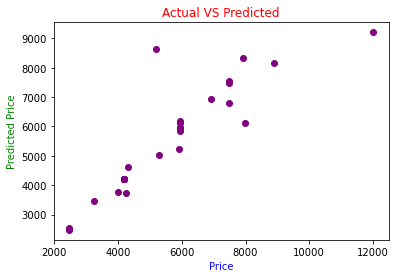

In [215]:

### let's plot the actual value and the predicted values and check how it look

plt.scatter(y_test,rfr_pred,color ='purple')
plt.xlabel('Price',color='blue')
plt.ylabel('Predicted Price',color='green')
plt.title('Actual VS Predicted',color='r')

#### From above scatter plot we can say that our best model draw a great linear relationshipe with the dataset.

## Hyper parameter Tuning (HPT)


In [216]:
### importing the libraries
from sklearn.model_selection import GridSearchCV

In [220]:
grid_param1 = {
    'criterion':['mse', 'mae'],
    'max_depth':range(2,10,3),
    'min_samples_leaf':range(1,10,2),
    'min_samples_split':range(2,10,2),
    'max_features':["auto", "sqrt", "log2"]
    }

In [221]:
grid_search1 = GridSearchCV(estimator=rfr,
                         param_grid=grid_param1,
                         cv=5,n_jobs=-1)

In [222]:
## again train the model

grid_search1.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=99), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': range(2, 10, 3),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [223]:
# best parameters

best_parameters = grid_search1.best_params_
print(best_parameters)

{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4}


In [238]:
## so let's build again the decisionTreeRegressor model

rfr_model = RandomForestRegressor(criterion='mse',
                            max_depth=8,
                            max_features= 'auto',
                            min_samples_leaf=1,
                            min_samples_split=4,
                                 random_state=99)

In [239]:
## let's fit gain the model with the data

rfr_model.fit(x_train,y_train)
pred_drfr = rfr_model.predict(x_test)

print("\n=============Test Result==============")

print(f"Accuracy :{metrics.r2_score(y_test,pred_drfr)*100:.2f}%")
print("_____________________________________________")


=============Test Result==============
Accuracy :76.66%
_____________________________________________


#### We got 76% accuracy after parameter which is less than previous model, so let's save our model as it is.

### Conclusion: our best model is RandomForestRegressor(rfr) withe accuracy = 78%.

### saving the model

In [240]:
import joblib

In [241]:
joblib.dump(rfr,'flight_price_prediction_model.pkl')

['flight_price_prediction_model.pkl']